# **TRANSFER LEARNING - CNN**

>## **CLASIFICACIÓN DE IMÁGENES CON TRANSFER LEARNING utilizando una red pre-entrenada llamada ResNet18**

> #### **BASE DE DATOS: CIFAR10**

####ÁNGELES GARRIDO

# The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60.000 32x32 colour images in 10 classes, with 6.000 images per class.

There are 50.000 training images and 10.000 test images.

# EN PRIMER LUGAR, CARGAMOS LAS LIBRERÍAS NECESARIAS

En caso de fallo de las librerías ejecutar las siguientes celdas ...



```
# En caso de fallo de la carga de classification_models
# !pip install git+https://github.com/qubvel/classification_models.git
```



In [ ]:
# Ejecutar en caso de fallo en la carga de classification_models
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-3ebvy5wg
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-3ebvy5wg
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20026 sha256=323b3ff2bb162c1b9074fd6390066cd2de3fdabd89f2562dd9e60c3d8b45598f
  Stored in directory: /tmp/pip-ephem-wheel-cache-gg3uxsbq/wheels/f5/13/cb/b1dbd79043c5a389742e422859b0b663adcd7b5c220928c339
Successfully built image-classifiers


In [ ]:
import numpy as np                   # Numpy
import matplotlib.pyplot as plt      # representación de gráficos

In [ ]:
# Librerías de KERAS
import keras
from keras.datasets import cifar10    # Base de datos de Keras CIFAR10
from keras.utils import to_categorical
# from keras.models import Sequential   # Modelo secuencial
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
# import keras.backend as K


La importación de la libreria de Modelos de Clasificación suele fallar, así que utilizarlo en caso necesario
```
import classification_models        # Modelos de Clasificación
```



In [ ]:
import classification_models        # Modelos de Clasificación

In [ ]:
from classification_models.keras import Classifiers  # Redes de clasificación de objetos

# PREPARACIÓN DE LOS DATOS

Cargamos el fichero que contiene todas las imágenes de la base de datos CIFAR10

Parámetros de salida de la función de carga cifar10.load_data()

**X_train**: conjunto de datos de entrenamiento.
Es un array de las imágenes con el formato (50000, 32, 32, 3). Pixeles entre 0 a 255.

**y_train**: etiquetas del conjunto de datos de entrenamiento.
Es un array of etiquetas (enteros entre 0-9) con formato (50000, 1).

**X_test**: conjunto de datos de test
Es un array con las imágenes con el formato (10000, 32, 32, 3). Pixeles entre 0 y 255.

**y_test**:
Es un array de etiquetas (enteros entre 0-9) con el formato (10000, 1).

In [ ]:
# Prepare your data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
#Definición de parámetros

num_images = X_train.shape[0]                                        # Número de imágenes
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])   # Formato de las imágenes (número de píxeles)
n_classes = np.unique(y_train).shape[0]                              # Número de etiquetas diferentes

print(num_images)
print(input_shape)
print(n_classes)

50000
(32, 32, 3)
10


One Hot Encoding: es un proceso en el procesamiento de datos que se aplica a datos categóricos, para convertirlos en una representación de vector binario para su uso en algoritmos de aprendizaje automático.
Codifica los valores como una matriz de vector binario

Simplemente crea una columna para cada etiqueta y coloca un 1 en la columna correspondiente.

In [ ]:
# One-hot encoding
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

VECTOR CON LOS NOMBRES DE LAS ETIQUETAS

In [ ]:
classname = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

# REPRESENTACIÓN GRÁFICA DE LAS IMÁGENES

Formato de cada imagen en el conjunto de entrenamiento:  (32, 32, 3)


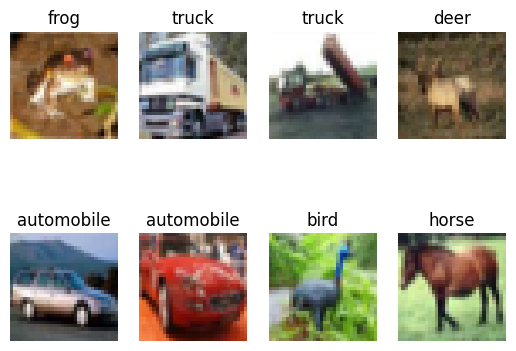

In [ ]:
# Representamos las 10 primeras imágenes

for i in range(1, 9):
    img = X_train[i-1]
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(classname[np.argmax(y_train[i-1])])

print("Formato de cada imagen en el conjunto de entrenamiento: ", X_train.shape[1:])

# ARQUITECTURA DE LA RED CONVOLUCIONAL

ResNet18 es una red convolucional ya diseñada y pre-entrenada de la librería CLASSIFIERS.

Cargamos la red

In [ ]:
ResNet18, preprocess_input = Classifiers.get('resnet18')

CONSTRUCCIÓN DEL MODELO BASE

En la red que acabamos de  cargar, hay una variable:

**include_top**: incluir una capa fully connected al principio (True, False).
No la incluimos

In [ ]:
# build model
base_model = ResNet18(input_shape = (32,32,3), include_top = False)

In [ ]:
# A la salida del modelo anterior le añadimos una capa de global Average Pooling
x = keras.layers.GlobalAveragePooling2D()(base_model.output)

# Definimos una capa densa con la función de activación "softmax" para sacar las probabilidades de las clases
# Esta función será la capa de salida del modelo que se diseña
output = keras.layers.Dense(n_classes, activation='softmax')(x)

model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# Sumario del modelo
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 32, 32, 3)            9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 38, 38, 3)            0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

### COMPILACIÓN ###

In [ ]:
# Compilamos el modelo
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

**Tiempo estimado de entrenamiento**: 32 minutos

In [ ]:
epochs = 20
batch_size = 128

import time
start_time = time.time()

history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test), verbose=1)
end_time = time.time()

# Tiempo de entrenamiento
elapsed_time = end_time - start_time

Epoch 1/20
391/391 [==============================] - 31s 39ms/step - loss: 1.7518 - accuracy: 0.3669 - val_loss: 1.5403 - val_accuracy: 0.4449
Epoch 2/20
391/391 [==============================] - 14s 35ms/step - loss: 1.3670 - accuracy: 0.5090 - val_loss: 1.3950 - val_accuracy: 0.5032
Epoch 3/20
391/391 [==============================] - 14s 36ms/step - loss: 1.1810 - accuracy: 0.5804 - val_loss: 1.3409 - val_accuracy: 0.5230
Epoch 4/20
391/391 [==============================] - 14s 36ms/step - loss: 1.0227 - accuracy: 0.6433 - val_loss: 1.3260 - val_accuracy: 0.5359
Epoch 5/20
391/391 [==============================] - 14s 36ms/step - loss: 0.8829 - accuracy: 0.6990 - val_loss: 1.3110 - val_accuracy: 0.5402
Epoch 6/20
391/391 [==============================] - 14s 37ms/step - loss: 0.7451 - accuracy: 0.7501 - val_loss: 1.3138 - val_accuracy: 0.5567
Epoch 7/20
391/391 [==============================] - 14s 35ms/step - loss: 0.6098 - accuracy: 0.8005 - val_loss: 1.3730 - val_accuracy:

In [ ]:
print('Tiempo estimado de entrenamiento (seg.):', np.around(elapsed_time))
print('Tiempo estimado de entrenamiento (min.):', np.around(elapsed_time/60))

Tiempo estimado de entrenamiento (seg.): 326.0
Tiempo estimado de entrenamiento (min.): 5.0


<Figure size 640x480 with 0 Axes>

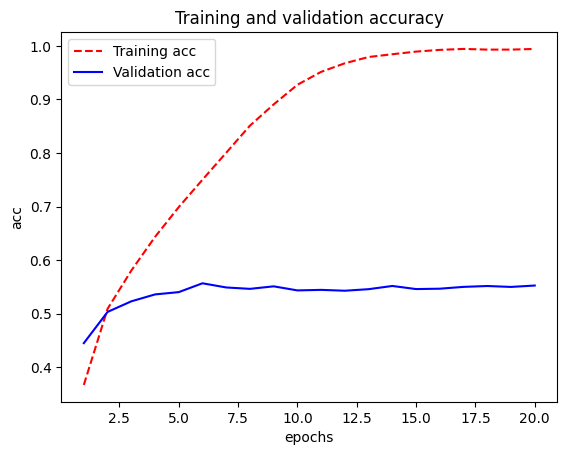

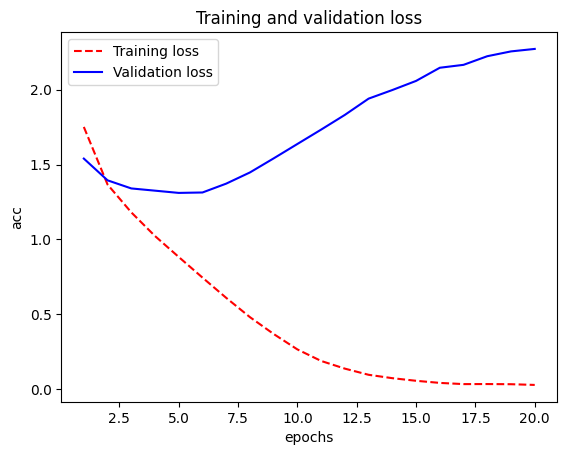

<Figure size 640x480 with 0 Axes>

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[         'loss' ]
val_loss = history.history[     'val_loss' ]

# Vector con el número de épocas

epochs   = range(1,len(acc)+1,1)


# REPRESENTACIÓN GRÁFICA

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--', label='Training loss'  )
plt.plot ( epochs, val_loss , 'b' , label='Validation loss' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

Evaluamos el modelo entrenado

In [ ]:
start_time = time.time()

test_loss, test_acc = model.evaluate(X_test,y_test)

end_time = time.time()

# Visualizamos la pérdida y la precisión
print('\nTest loss: {}'.format(test_loss))
print('\nTest accuracy: {}'.format(test_acc))

313/313 [==============================] - 3s 9ms/step - loss: 2.2730 - accuracy: 0.5525

Test loss: 2.273040533065796

Test accuracy: 0.5525000095367432


In [ ]:
# Tiempo de test
elapsed_time_test = end_time - start_time
print('Tiempo estimado de test (min):', np.around(elapsed_time_test/60))

Tiempo estimado de test (min): 0.0


# ATENCIÓN CUIDADO QUE TARDA MUCHO, COMO UNOS 15 minutos

# Imágenes mal clasificadas en el conjunto de test

In [ ]:
# Inicializamos variables
actual = np.argmax(y_test, axis=1)  #posición del argumento máximo por fila (es la clase)
prediction = []
accuracy = []

# TruePred=[]
incorrect_pred = []
correct_pred = []
incorrect_class = []
predictions = []
actuals = []

start_time = time.time()

for idx, val in enumerate(X_test):   # itera sobre el índice del conjunto de test
  val = np.expand_dims(val, axis=0)
  pred = model.predict(val)
  predicted_value = np.argmax(pred, axis=1)
  prediction.append(predicted_value)
  accuracy.append(np.amax(pred, axis=1)*100)
  if actual[idx] != predicted_value:
      incorrect_pred.append(idx)
      predictions.append(int(predicted_value))
      actuals.append(int(actual[idx]))
  else:
      correct_pred.append(idx)

end_time = time.time()

In [ ]:
# Tiempo de imágenes mal clasificadas
elapsed_time_misclass = end_time - start_time
print('Tiempo estimado de entrenamiento (min):', np.around(elapsed_time_misclass/60))

Tiempo estimado de entrenamiento (min): 0.0


# REPRESENTACIÓN DE IMÁGENES MAL CLASIFICADAS

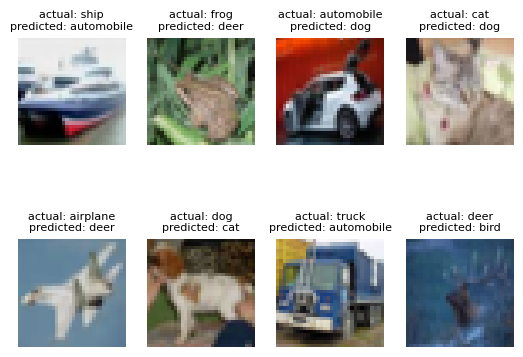

In [ ]:
for i in range(1, 9):
    img = X_test[incorrect_pred[i-1]]
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title("actual: %s\npredicted: %s" % (classname[actuals[i-1]], classname[predictions[i-1]]), fontsize=8)